In [4]:
import pandas as pd
import numpy as np

import bambi as bmb
import kulprit as kpt

import arviz as az
import matplotlib.pyplot as plt

# define model data
data = pd.DataFrame({
    "y": np.random.normal(size=50),
    "g": np.random.choice(["Yes", "No"], size=50),
    "x1": np.random.normal(size=50),
    "x2": np.random.normal(size=50)
})
# define and fit model with MCMC
model = bmb.Model("y ~ x1 + x2", data, family="gaussian")
posterior = model.fit()
# build reference model object
proj = kpt.Projector(model, posterior)
# project the reference model to some parameter subset and plot posterior
cov_names = ["x1", "x2"]
theta_perp = proj.project(cov_names=cov_names)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_sigma, x2, x1, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


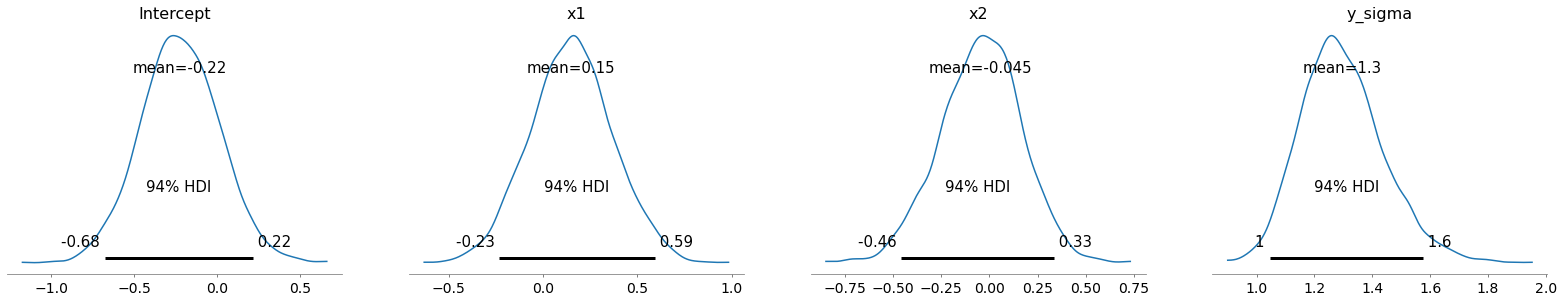

In [5]:
az.plot_posterior(theta_perp.posterior)
plt.show()

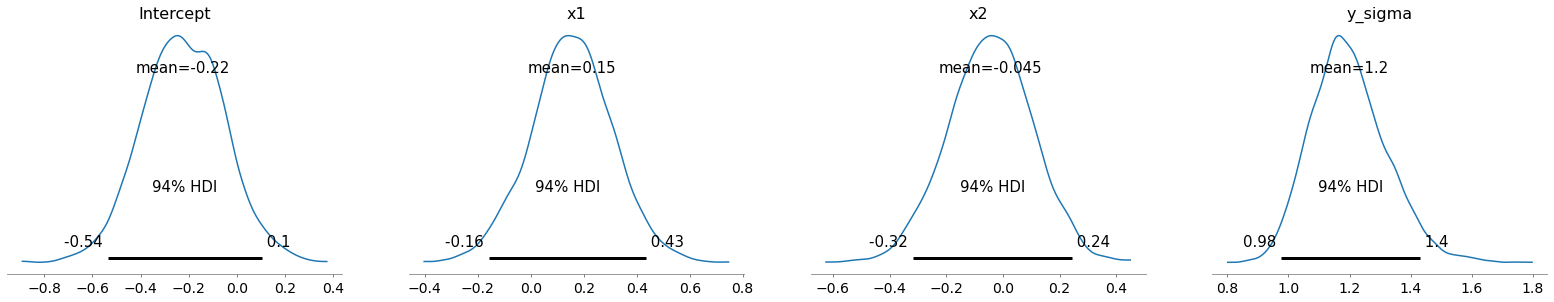

In [6]:
az.plot_posterior(posterior, var_names=["Intercept", "x1", "x2", "y_sigma"])
plt.show()